<a href="https://colab.research.google.com/github/peculab/DFTDescriptorPipeline/blob/main/examples/heck_boronic_acids/heck_boronic_acids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /usr/local/lib/python3.11/dist-packages/descriptors

In [2]:
# ✅ Reset environment
%cd /content
import shutil, os, sys, importlib

# 🔁 Uninstall pip-installed descriptors
!pip uninstall -y descriptors

# 🔥 Clear cached modules
for k in list(sys.modules.keys()):
    if k.startswith("descriptors"):
        del sys.modules[k]

# 🧹 Remove previous repo
if os.path.exists("DFTDescriptorPipeline"):
    shutil.rmtree("DFTDescriptorPipeline")

/content


In [3]:
# ✅ Install required packages
!pip install morfeus-ml scikit-learn joblib matplotlib openpyxl

# ✅ Clone the latest repo
!git clone https://github.com/peculab/DFTDescriptorPipeline.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 4.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=7b7c89cc84f4f07405d98041acf4e1a293c7a9a40043e69c14672808a5d639cc
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
Cloning into 'DFTDescriptorPipeline'...
remote: Enumerating objects: 625, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 625 (delta 28), reused 3 (delta 3), pack-reused 567 (from 1)
Receiving objects: 100% (625/625), 35.84 MiB | 23.39 MiB/s, done.
Resolving deltas: 100% (374/374), done.
Updating files: 100% (96/96), done.


In [4]:
# ✅ Set module path
from morfeus import read_xyz, Sterimol
from morfeus.utils import get_radii

import shutil, os, sys, importlib
sys.path.insert(0, "/content/DFTDescriptorPipeline/descriptors")
import extractor_regr
import glob, os
importlib.reload(extractor_regr)

<module 'extractor_regr' from '/content/DFTDescriptorPipeline/descriptors/extractor_regr.py'>


[STEP1] Read Excel: /content/DFTDescriptorPipeline/examples/heck_boronic_acids/Heck_boronic_acid.xlsx

[STEP2] Extracting log features for each unique Ar...

==== [1/17] [H] Processing log: /content/DFTDescriptorPipeline/examples/heck_boronic_acids/logfiles/H.log ====
Found C1: 7, C2: 6, A: 9, B: 15, D: 8, F: 1, G: 5

==== [2/17] [o-F] Processing log: /content/DFTDescriptorPipeline/examples/heck_boronic_acids/logfiles/o-F.log ====
Found C1: 7, C2: 6, A: 9, B: 15, D: 8, F: 1, G: 5

==== [3/17] [o-Cl] Processing log: /content/DFTDescriptorPipeline/examples/heck_boronic_acids/logfiles/o-Cl.log ====
Found C1: 7, C2: 6, A: 9, B: 15, D: 8, F: 1, G: 5

==== [4/17] [o-CF3] Processing log: /content/DFTDescriptorPipeline/examples/heck_boronic_acids/logfiles/o-CF3.log ====
Found C1: 7, C2: 6, A: 9, B: 18, D: 8, F: 1, G: 1

==== [5/17] [o-Me] Processing log: /content/DFTDescriptorPipeline/examples/heck_boronic_acids/logfiles/o-Me.log ====
Found C1: 7, C2: 6, A: 9, B: 15, D: 8, F: 1, G: 5

==== [6

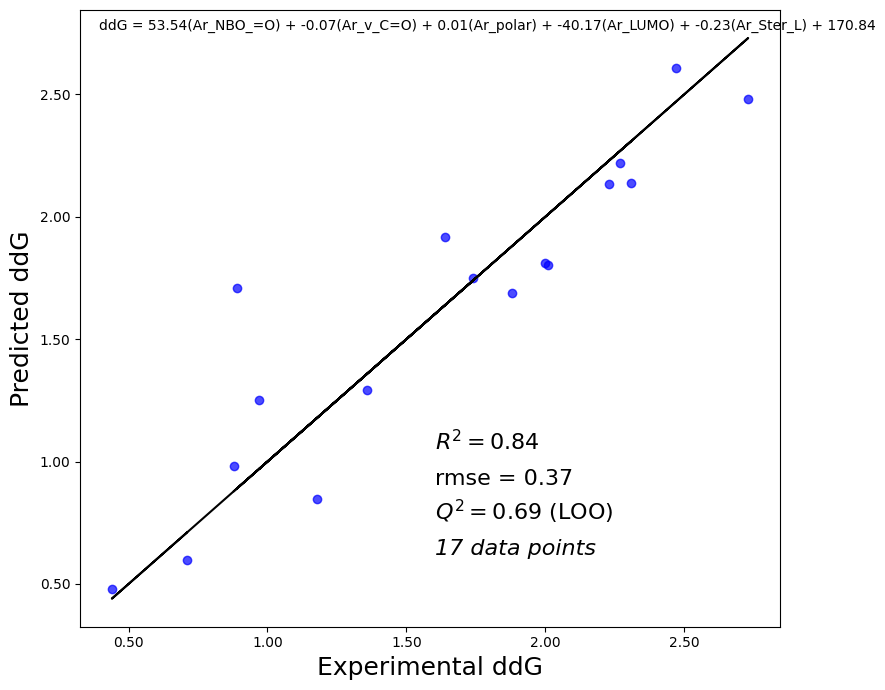


✅ Analysis complete!


In [5]:
# Specify folder and file path
data_dir = "/content/DFTDescriptorPipeline/examples/heck_boronic_acids"
xlsx_path = glob.glob(os.path.join(data_dir, "*.xlsx"))[0]
log_folder = os.path.join(data_dir, "logfiles")

# One-click execution
df, results, best_model = extractor_regr.run_full_pipeline(
    log_folder=log_folder,
    xlsx_path=xlsx_path,
    target='ddG',
    auto_pairing=False,
)